In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=300, noise=0.1)

In [5]:
X.shape, y.shape

((300, 2), (300,))

In [8]:
X_outliers=np.random.uniform(low=-3, high=3, size=(20,2))

In [9]:
X_outliers

array([[ 2.35117481,  2.45996232],
       [-1.3900622 ,  1.69423689],
       [ 2.30455842, -2.75506297],
       [-0.25555843,  1.27190396],
       [-0.67133279,  2.39147906],
       [ 2.60792558, -2.34447159],
       [-0.3102953 ,  0.22096888],
       [ 1.7853134 ,  0.86366951],
       [-1.49071976, -0.59648543],
       [-1.94586788,  2.70412915],
       [ 0.24046219, -0.85488303],
       [ 1.71150641, -0.35321218],
       [-0.09853786, -1.92181554],
       [-1.20260551, -1.8151706 ],
       [-2.87465912, -0.72002874],
       [ 1.72083175, -0.8853162 ],
       [-0.31990877,  0.11457042],
       [-2.6401413 , -1.68147235],
       [ 0.00966037, -2.2467247 ],
       [ 1.12965275,  0.44614969]])

In [10]:
X=np.vstack((X,X_outliers))

In [12]:
X.shape

(320, 2)

In [14]:
out=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred=out.fit_predict(X)

In [15]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

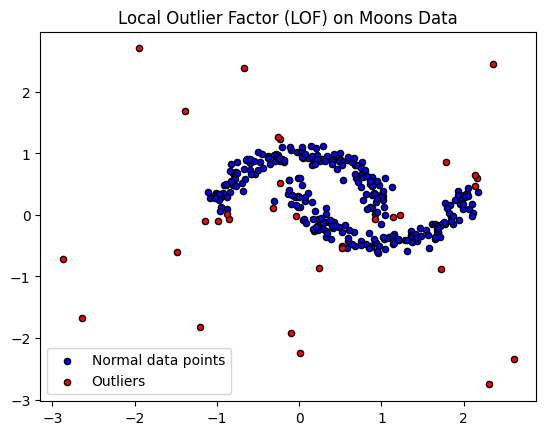

In [17]:
# Separate normal data points>>inliers and outliers 
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=20, edgecolor='k', label='Normal data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()